# <font color=darkred>Laboratory 17: "A Bullet or A Goat?" or "Things you should know before playing with strangers!"</font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonahC:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)



## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook: lab 17
## Date:
___

# <font color=purple>Python for Simulation</font>

## What is Russian roulette?
>Russian roulette (Russian: русская рулетка, russkaya ruletka) is a lethal game of chance in which a player places a single round in a revolver, spins the cylinder, places the muzzle against their head, and pulls the trigger in hopes that the loaded chamber does not align with the primer percussion mechanism and the barrel, causing the weapon to discharge. Russian refers to the supposed country of origin, and roulette to the element of risk-taking and the spinning of the revolver's cylinder, which is reminiscent of a spinning roulette wheel. <br>
- Wikipedia @ https://en.wikipedia.org/wiki/Russian_roulette

![](https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/echoes-of-the-great-war-the-revolver-weston-westmoreland.jpg)

>A game of dafts, a game of chance <br>
One where revolver's the one to dance <br>
Rounds and rounds, it goes and spins <br>
Makes you regret all those sins <br> \
A game of fools, one of lethality  <br>
With a one to six probability <br>
There were two guys and a gun <br>
With six chambers but only one... <br> \
CLICK, one pushed the gun <br>
CLICK, one missed the fun <br>
CLICK, "that awful sound" ... <br>
BANG!, one had his brains all around! <br>

___
### Example: Simulate a game of Russian Roulette:
- For 2 rounds
- For 5 rounds
- For 10 rounds

In [7]:
import numpy as np                     #import numpy
revolver = np.array([1,0,0,0,0,0])     #create a numpy array with 1 bullet and 5 empty chambers
print(np.random.choice(revolver,2))              #randomly select a value from revolver - simulation

[0 0]


In [8]:
print(np.random.choice(revolver,5))

[0 1 0 0 0]


In [9]:
print(np.random.choice(revolver,10))

[1 0 0 1 0 0 0 1 0 0]


![](https://blog.uvm.edu/aivakhiv/files/2020/06/d4cawex-fd18072b-6140-48d9-93d7-0fa9435abf0e.png)

### Let's Make A Deal Game Show and Monty Hall Problem 
__The Monty Hall problem is a brain teaser, in the form of a probability puzzle, loosely based on the American television game show Let's Make a Deal and named after its original host, Monty Hall. The problem was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in 1975 (Selvin 1975a), (Selvin 1975b).__

>"Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?"

__*From Wikipedia: https://en.wikipedia.org/wiki/Monty_Hall_problem*__

![](https://thumbs.gfycat.com/ClearcutFragrantArcherfish-size_restricted.gif)

![](http://www.bcmath.ca/m10h/The%20Monty%20Hall%20Problem%20(Web)/data/img1.png)

![](https://webstockreview.net/images/clipart-door-orange-door-3.png)

![](https://brilliant-staff-media.s3-us-west-2.amazonaws.com/tiffany-wang/UcEdvPuGYw.png)

___
### Example: Simulate Monty Hall Game for 1000 times. Use a barplot and discuss whether players are better off sticking to their initial choice, or switching doors? 

In [10]:
def othergoat(x):         #Define a function to return "the other goat"!
    if x == "Goat 1":
        return "Goat 2"
    elif x == "Goat 2":
        return "Goat 1"

In [11]:
Doors = np.array(["Car","Goat 1","Goat 2"])     #Define a list for objects behind the doors
goats = np.array(["Goat 1" , "Goat 2"])          #Define a list for goats!

def MHgame():
    #Function to simulate the Monty Hall Game
    #For each guess, return ["the guess","the revealed", "the remaining"]
    userguess=np.random.choice(Doors)         #randomly selects a door as userguess
    if userguess == "Goat 1":
        return [userguess, "Goat 2","Car"]
    if userguess == "Goat 2":
        return [userguess, "Goat 1","Car"]
    if userguess == "Car":
        revealed = np.random.choice(goats)
        return [userguess, revealed,othergoat(revealed)]

In [12]:
# Check and see if the MHgame function is doing what it is supposed to do:
for i in np.arange(1):
    a =MHgame()
    print(a)
    print(a[0])
    print(a[1])
    print(a[2])

['Goat 1', 'Goat 2', 'Car']
Goat 1
Goat 2
Car


In [13]:
c1 = []         #Create an empty list for the userguess
c2 = []         #Create an empty list for the revealed
c3 = []         #Create an empty list for the remaining
for i in np.arange(1000):         #Simulate the game for 1000 rounds - or any other number of rounds you desire
    game = MHgame()
    c1.append(game[0])             #In each round, add the first element to the userguess list
    c2.append(game[1])             #In each round, add the second element to the revealed list
    c3.append(game[2])             #In each round, add the third element to the remaining list


In [14]:
import pandas as pd
#Create a data frame (gamedf) with 3 columns ("Guess","Revealed", "Remaining") and 1000 (or how many number of rounds) rows
gamedf = pd.DataFrame({'Guess':c1,
                       'Revealed':c2,
                       'Remaining':c3})
gamedf

,Guess,Revealed,Remaining
0,Goat 1,Goat 2,Car
1,Goat 1,Goat 2,Car
2,Goat 2,Goat 1,Car
3,Goat 2,Goat 1,Car
4,Goat 2,Goat 1,Car
...,...,...,...
995,Goat 2,Goat 1,Car
996,Goat 1,Goat 2,Car
997,Goat 1,Goat 2,Car
998,Goat 2,Goat 1,Car


In [15]:
# Get the count of each item in the first and 3rd column
original_car =gamedf[gamedf.Guess == 'Car'].shape[0]
remaining_car =gamedf[gamedf.Remaining == 'Car'].shape[0]

original_g1 =gamedf[gamedf.Guess == 'Goat 1'].shape[0]
remaining_g1 =gamedf[gamedf.Remaining == 'Goat 1'].shape[0]

original_g2 =gamedf[gamedf.Guess == 'Goat 2'].shape[0]
remaining_g2 =gamedf[gamedf.Remaining == 'Goat 2'].shape[0]

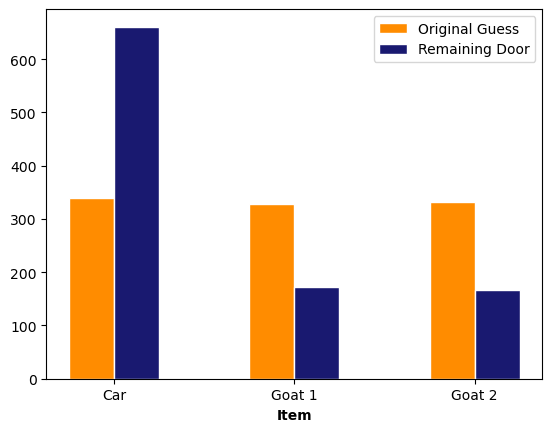

In [16]:
# Let's plot a grouped barplot
import matplotlib.pyplot as plt  

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = [original_car,original_g1,original_g2]
bars2 = [remaining_car,remaining_g1,remaining_g2]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='darkorange', width=barWidth, edgecolor='white', label='Original Guess')
plt.bar(r2, bars2, color='midnightblue', width=barWidth, edgecolor='white', label='Remaining Door')
 
# Add xticks on the middle of the group bars
plt.xlabel('Item', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(bars1))], ['Car', 'Goat 1', 'Goat 2'])
 
# Create legend & Show graphic
plt.legend()
plt.show()


<font color=crimson>__According to the plot, it is statitically beneficial for the players to switch doors because the initial chance for being correct is only 1/3__</font>

![](http://imgs.xkcd.com/comics/monty_hall.png)

___
### Probability Examples: 
- A) Write a function to find the probability of an event in percentage form based on given outcomes and sample space
- B) Use the function and compute the probability of rolling a 4 with a D6
- C) Use the function and compute the probability of drawing a King from a standard deck of cards
- D) Use the function and compute the probability of drawing the King of Hearts from a standard deck of cards
- E) Use the function and compute the probability of drawing an ace after drawing a king
- F) Use the function and compute the probability of drawing an ace after drawing an ace
- G) Use the function and compute the probability of drawing a heart OR a club
- F) Use the function and compute the probability of drawing a Royal Flush <br>
*hint: (in poker) a straight flush including ace, king, queen, jack, and ten all in the same suit, which is the hand of the highest possible value

__This problem is designed based on an example by *Daniel Poston* from DataCamp, accessible @ *https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1*__

In [17]:
# A
# Create function that returns probability percent rounded to one decimal place
def Prob(outcome, sampspace):
    probability = (outcome / sampspace) * 100
    return round(probability, 1)

In [18]:
# B
outcome = 1       #Rolling a 4 is only one of the possible outcomes
space = 6         #Rolling a D6 can have 6 different outcomes
Prob(outcome, space)

16.7

In [19]:
# C
outcome = 4       #Drawing a king is four of the possible outcomes
space = 52        #Drawing from a standard deck of cards can have 52 different outcomes
Prob(outcome, space)

7.7

In [20]:
# D
outcome = 1       #Drawing the king of hearts is only 1 of the possible outcomes
space = 52        #Drawing from a standard deck of cards can have 52 different outcomes
Prob(outcome, space)

1.9

In [21]:
# E
outcome = 4       #Drawing an ace is 4 of the possible outcomes
space = 51        #One card has been drawn
Prob(outcome, space)

7.8

In [22]:
# F
outcome = 3       #Once Ace is already drawn
space = 51        #One card has been drawn
Prob(outcome, space)

5.9

In [23]:
# G
hearts = 13       #13 cards of hearts in a deck
space = 52        #total number of cards in a deck
clubs = 13        #13 cards of clubs in a deck
Prob_heartsORclubs= Prob(hearts, space) + Prob(clubs, space)
print("Probability of drawing a heart or a club is",Prob_heartsORclubs,"%")

Probability of drawing a heart or a club is 50.0 %


In [24]:
# F
draw1 = 5       #5 cards are needed
space1 = 52        #out of the possible 52 cards
draw2 = 4       #4 cards are needed
space2 = 51        #out of the possible 51 cards
draw3 = 3       #3 cards are needed
space3 = 50        #out of the possible 50 cards
draw4 = 2       #2 cards are needed
space4 = 49        #out of the possible 49 cards
draw5 = 1       #1 cards is needed
space5 = 48        #out of the possible 48 cards

#Probability of a getting a Royal Flush
Prob_RF= 4*(Prob(draw1, space1)/100) * (Prob(draw2, space2)/100) * (Prob(draw3, space3)/100) * (Prob(draw4, space4)/100) * (Prob(draw5, space5)/100)     
print("Probability of drawing a royal flush is",Prob_RF,"%")

Probability of drawing a royal flush is 1.5473203199999998e-06 %


___
### EXERCISE: Two unbiased dice are thrown once and the total score is observed. Define an appropriate function and use a simulation to find the estimated probability that :
- the total score is greater than 10?
- the total score is even and greater than 7?


In [35]:
import random

def simulate_dice(num_simulations):
    count_total_gt_10 = 0  # total score is greater than 10
    count_total_even_gt_7 = 0  #  total score is even and greater than 7

    for _ in range(num_simulations):
        # Simulate rolling two unbiased dice
        die1 = random.randint(1, 6)
        die2 = random.randint(1, 6)
        
        total_score = die1 + die2

        # Check if the total score is greater than 10
        if total_score > 10:
            count_total_gt_10 += 1

        # Check if the total score is even and greater than 7
        if total_score > 7 and total_score % 2 == 0:
            count_total_even_gt_7 += 1

    # Calculate estimated probabilities in percentage
    prob_total_gt_10 = (count_total_gt_10 / num_simulations) * 100
    prob_total_even_gt_7 = (count_total_even_gt_7 / num_simulations) * 100

    return prob_total_gt_10, prob_total_even_gt_7

# Define the number of simulations
num_simulations = 10000

#  estimated probabilities in percentage
prob_total_gt_10, prob_total_even_gt_7 = simulate_dice(num_simulations)

# Print the estimated probabilities as percentages
print("Estimated Probability (Total Score > 10): {:.2f}%".format(prob_total_gt_10))
print("Estimated Probability (Total Score is Even and > 7): {:.2f}%".format(prob_total_even_gt_7))

Estimated Probability (Total Score > 10): 8.40%
Estimated Probability (Total Score is Even and > 7): 25.16%


___
### EXERCISE 2: An urn contains 10 white balls, 20 reds and 30 greens. We want to draw 5 balls with replacement. Use a simulation (10000 trials) to find the estimated probability that:
- we draw 3 white and 2 red balls
- we draw 5 balls of the same color



In [36]:
import random

def simulate_draws(num_simulations):
    count_draw_3_white_2_red = 0  # Count of simulations where we draw 3 white and 2 red balls
    count_draw_5_same_color = 0  # Count of simulations where we draw 5 balls of the same color

    for _ in range(num_simulations):
        draws = [random.choice(["white", "red", "green"]) for _ in range(5)]

        # Check if we draw 3 white and 2 red balls
        if draws.count("white") == 3 and draws.count("red") == 2:
            count_draw_3_white_2_red += 1

        # Check if we draw 5 balls of the same color
        if all(draw == draws[0] for draw in draws):
            count_draw_5_same_color += 1

    # Calculate estimated probabilities in percentage
    prob_draw_3_white_2_red = (count_draw_3_white_2_red / num_simulations) * 100
    prob_draw_5_same_color = (count_draw_5_same_color / num_simulations) * 100

    return prob_draw_3_white_2_red, prob_draw_5_same_color

# Define the number of simulations
num_simulations = 10000

# estimated probabilities in percentage
prob_draw_3_white_2_red, prob_draw_5_same_color = simulate_draws(num_simulations)

# Print the estimated probabilities as percentages
print("Estimated Probability (Draw 3 White and 2 Red Balls): {:.2f}%".format(prob_draw_3_white_2_red))
print("Estimated Probability (Draw 5 Balls of the Same Color): {:.2f}%".format(prob_draw_5_same_color))

Estimated Probability (Draw 3 White and 2 Red Balls): 4.04%
Estimated Probability (Draw 5 Balls of the Same Color): 1.25%


In [ ]:
# B


___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*Here are some of the resources used for creating this notebook:* 


- __"Poker Probability and Statistics with Python"__ by __Daniel Poston__ available at *https://www.datacamp.com/community/tutorials/statistics-python-tutorial-probability-1*<br>
- __"Simulating probability events in Python"__ by __Elliott Saslow__ available at *https://medium.com/future-vision/simulating-probability-events-in-python-5dd29e34e381*<br>


*Here are some great reads on this topic:* 
- __"Simulate the Monty Hall Problem Using Python"__ by __randerson112358__ available at *https://medium.com/swlh/simulate-the-monty-hall-problem-using-python-7b76b943640e* <br>
- __"The Monty Hall problem"__ available at *https://scipython.com/book/chapter-4-the-core-python-language-ii/examples/the-monty-hall-problem/*<br>
- __"Introduction to Probability Using Python"__ by __Lisandra Melo__ available at *https://medium.com/future-vision/simulating-probability-events-in-python-5dd29e34e381* <br>
- __"Introduction to probability and statistics for Data Scientists and machine learning using python : Part-1"__ by __Arun Singh__ available at *https://medium.com/@anayan/introduction-to-probability-and-statistics-for-data-scientists-and-machine-learning-using-python-377a9b082487*<br>

*Here are some great videos on these topics:* 
- __"Monty Hall Problem - Numberphile"__ by __Numberphile__ available at *https://www.youtube.com/watch?v=4Lb-6rxZxx0* <br>
- __"The Monty Hall Problem"__ by __D!NG__ available at *https://www.youtube.com/watch?v=TVq2ivVpZgQ* <br>
- __"21 - Monty Hall - PROPENSITY BASED THEORETICAL MODEL PROBABILITY - MATHEMATICS in the MOVIES"__ by __Motivating Mathematical Education and STEM__ available at *https://www.youtube.com/watch?v=iBdjqtR2iK4* <br>
- __"The Monty Hall Problem"__ by __niansenx__ available at *https://www.youtube.com/watch?v=mhlc7peGlGg* <br>
- __"The Monty Hall Problem - Explained"__ by __AsapSCIENCE__ available at *https://www.youtube.com/watch?v=9vRUxbzJZ9Y* <br>
- __"Introduction to Probability | 365 Data Science Online Course"__ by __365 Data Science__ available at *https://www.youtube.com/watch?v=soZRfdnkUQg* <br>
- __"Probability explained | Independent and dependent events | Probability and Statistics | Khan Academy"__ by __Khan Academy__ available at *https://www.youtube.com/watch?v=uzkc-qNVoOk* <br>
- __"Math Antics - Basic Probability"__ by __mathantics__ available at *https://www.youtube.com/watch?v=KzfWUEJjG18* <br>

![](https://cdn.quotes.pub/660x400/thats-too-bad-mr-hall-said-opening-door-579647.jpg)